In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drifts = {}

drifts['ks_drifts_1m'] = pd.read_csv('/home/cc/clio/drift-detection/output/ks_drift_results_1063_1m.csv')
drifts['ks_drifts_5m'] = pd.read_csv('/home/cc/clio/drift-detection/output/ks_drift_results_1063_5m.csv')
drifts['ks_drifts_10m'] = pd.read_csv('/home/cc/clio/drift-detection/output/ks_drift_results_1063_10m.csv')
drifts['cramer_drifts_1m'] = pd.read_csv('/home/cc/clio/drift-detection/output/cramer_drift_results_1063_1m.csv')
drifts['cramer_drifts_5m'] = pd.read_csv('/home/cc/clio/drift-detection/output/cramer_drift_results_1063_5m.csv')
drifts['cramer_drifts_10m'] = pd.read_csv('/home/cc/clio/drift-detection/output/cramer_drift_results_1063_10m.csv')
# drifts['lsdd_drifts'] = pd.read_csv('/home/cc/clio/drift-detection/output/lsdd_drift_results_1063_1m.csv')
# drifts['mmd_drifts'] = pd.read_csv('/home/cc/clio/drift-detection/output/mmd_drift_results_1063_1m.csv')

features = ['iops', 'read_write_ratio', 'write_size_ratio']
drifts['ks_drifts_1m']

,Window_Index,Is_Drift,iops_pval,read_write_ratio_pval,write_size_ratio_pval,iops_distance,read_write_ratio_distance,write_size_ratio_distance,overlapped_pvals_drift,overlapped_pvals_nondrift,iops_pval_drift,iops_pval_nondrift,read_write_ratio_pval_drift,read_write_ratio_pval_nondrift,write_size_ratio_pval_drift,write_size_ratio_pval_nondrift,start,end
0,1,0,2.347090e-03,0.088290,0.009211,0.233333,0.158333,0.208333,0,0,0,0,0,0,0,0,0,240
1,2,0,2.097888e-02,0.863287,0.281505,0.191667,0.075000,0.125000,0,0,0,0,0,1,0,0,60,300
2,3,1,5.089932e-04,0.044556,0.660385,0.258333,0.175000,0.091667,0,0,0,0,0,0,0,1,120,360
3,4,0,4.505034e-01,0.088290,0.216302,0.108333,0.158333,0.133333,0,0,0,1,0,0,0,0,180,420
4,5,1,1.677401e-04,0.005944,0.281505,0.275000,0.216667,0.125000,0,0,0,0,0,0,0,0,240,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,207,1,2.761754e-05,0.009211,0.000295,0.300000,0.208333,0.266667,0,0,0,0,0,0,0,0,12360,12600
207,208,0,8.632875e-01,0.767580,0.767580,0.075000,0.083333,0.083333,0,1,0,1,0,1,0,1,12420,12660
208,209,1,9.273566e-11,0.030841,0.020979,0.433333,0.183333,0.191667,0,0,0,0,0,0,0,0,12480,12720
209,210,1,5.089932e-04,0.359647,0.552196,0.258333,0.116667,0.100000,0,0,0,0,0,0,0,1,12540,12780


In [3]:
data_1 = pd.read_csv('/home/cc/clio/runs/raw/tencent/characteristic/1063/1m/characteristic.csv')
data_5 = pd.read_csv('/home/cc/clio/runs/raw/tencent/characteristic/1063/5m/characteristic.csv')
data_10 = pd.read_csv('/home/cc/clio/runs/raw/tencent/characteristic/1063/10m/characteristic.csv')

# Dataset Construction

In [4]:
labels_1 = drifts['ks_drifts_1m'][['Window_Index', 'start', 'end']]
labels_5 = drifts['ks_drifts_5m'][['Window_Index', 'start', 'end']]
labels_10 = drifts['ks_drifts_10m'][['Window_Index', 'start', 'end']]

In [41]:
for feature in features:
    # 1 min
    labels_1[f'{feature}_pval_drift'] = 0
    condition = (drifts['ks_drifts_1m'][f'{feature}_pval_drift'] == 1) & (drifts['cramer_drifts_1m'][f'{feature}_pval_drift'] == 1)
    indices = drifts['ks_drifts_1m'].index[condition]
    labels_1.loc[indices, f'{feature}_pval_drift'] = 1
    
    labels_1[f'{feature}_pval_nondrift'] = 0
    condition = (drifts['ks_drifts_1m'][f'{feature}_pval_nondrift'] == 1) & (drifts['cramer_drifts_1m'][f'{feature}_pval_nondrift'] == 1)
    indices = drifts['ks_drifts_1m'].index[condition]
    labels_1.loc[indices, f'{feature}_pval_nondrift'] = 1
    
    # 5 min
    labels_5[f'{feature}_pval_drift'] = 0
    condition = (drifts['ks_drifts_5m'][f'{feature}_pval_drift'] == 1) | (drifts['cramer_drifts_5m'][f'{feature}_pval_drift'] == 1)
    indices = drifts['ks_drifts_5m'].index[condition]
    labels_5.loc[indices, f'{feature}_pval_drift'] = 1
    
    labels_5[f'{feature}_pval_nondrift'] = 0
    condition = (drifts['ks_drifts_5m'][f'{feature}_pval_nondrift'] == 1) | (drifts['cramer_drifts_5m'][f'{feature}_pval_nondrift'] == 1)
    indices = drifts['ks_drifts_5m'].index[condition]
    labels_5.loc[indices, f'{feature}_pval_nondrift'] = 1
    
    # 10 min
    labels_10[f'{feature}_pval_drift'] = 0
    condition = (drifts['ks_drifts_10m'][f'{feature}_pval_drift'] == 1) | (drifts['cramer_drifts_10m'][f'{feature}_pval_drift'] == 1)
    indices = drifts['ks_drifts_10m'].index[condition]
    labels_10.loc[indices, f'{feature}_pval_drift'] = 1
    
    labels_10[f'{feature}_pval_nondrift'] = 0
    condition = (drifts['ks_drifts_10m'][f'{feature}_pval_nondrift'] == 1) | (drifts['cramer_drifts_10m'][f'{feature}_pval_nondrift'] == 1)
    indices = drifts['ks_drifts_10m'].index[condition]
    labels_10.loc[indices, f'{feature}_pval_nondrift'] = 1

/tmp/ipykernel_410339/773540959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_1[f'{feature}_pval_drift'] = 0
/tmp/ipykernel_410339/773540959.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_1[f'{feature}_pval_nondrift'] = 0
/tmp/ipykernel_410339/773540959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [6]:
labels_1[f'iops_pval_drift'].sum(), labels_1[f'iops_pval_nondrift'].sum()

(13, 27)

# Initialize Output Dataframe

In [7]:
drift_df = pd.DataFrame(columns=['dataset_name', 'time_split', 'start', 'end', 'feature', 'drift'])

dataset_name = '1063'

In [17]:
features

['iops', 'read_write_ratio', 'write_size_ratio']

# Recheck - 1min

13


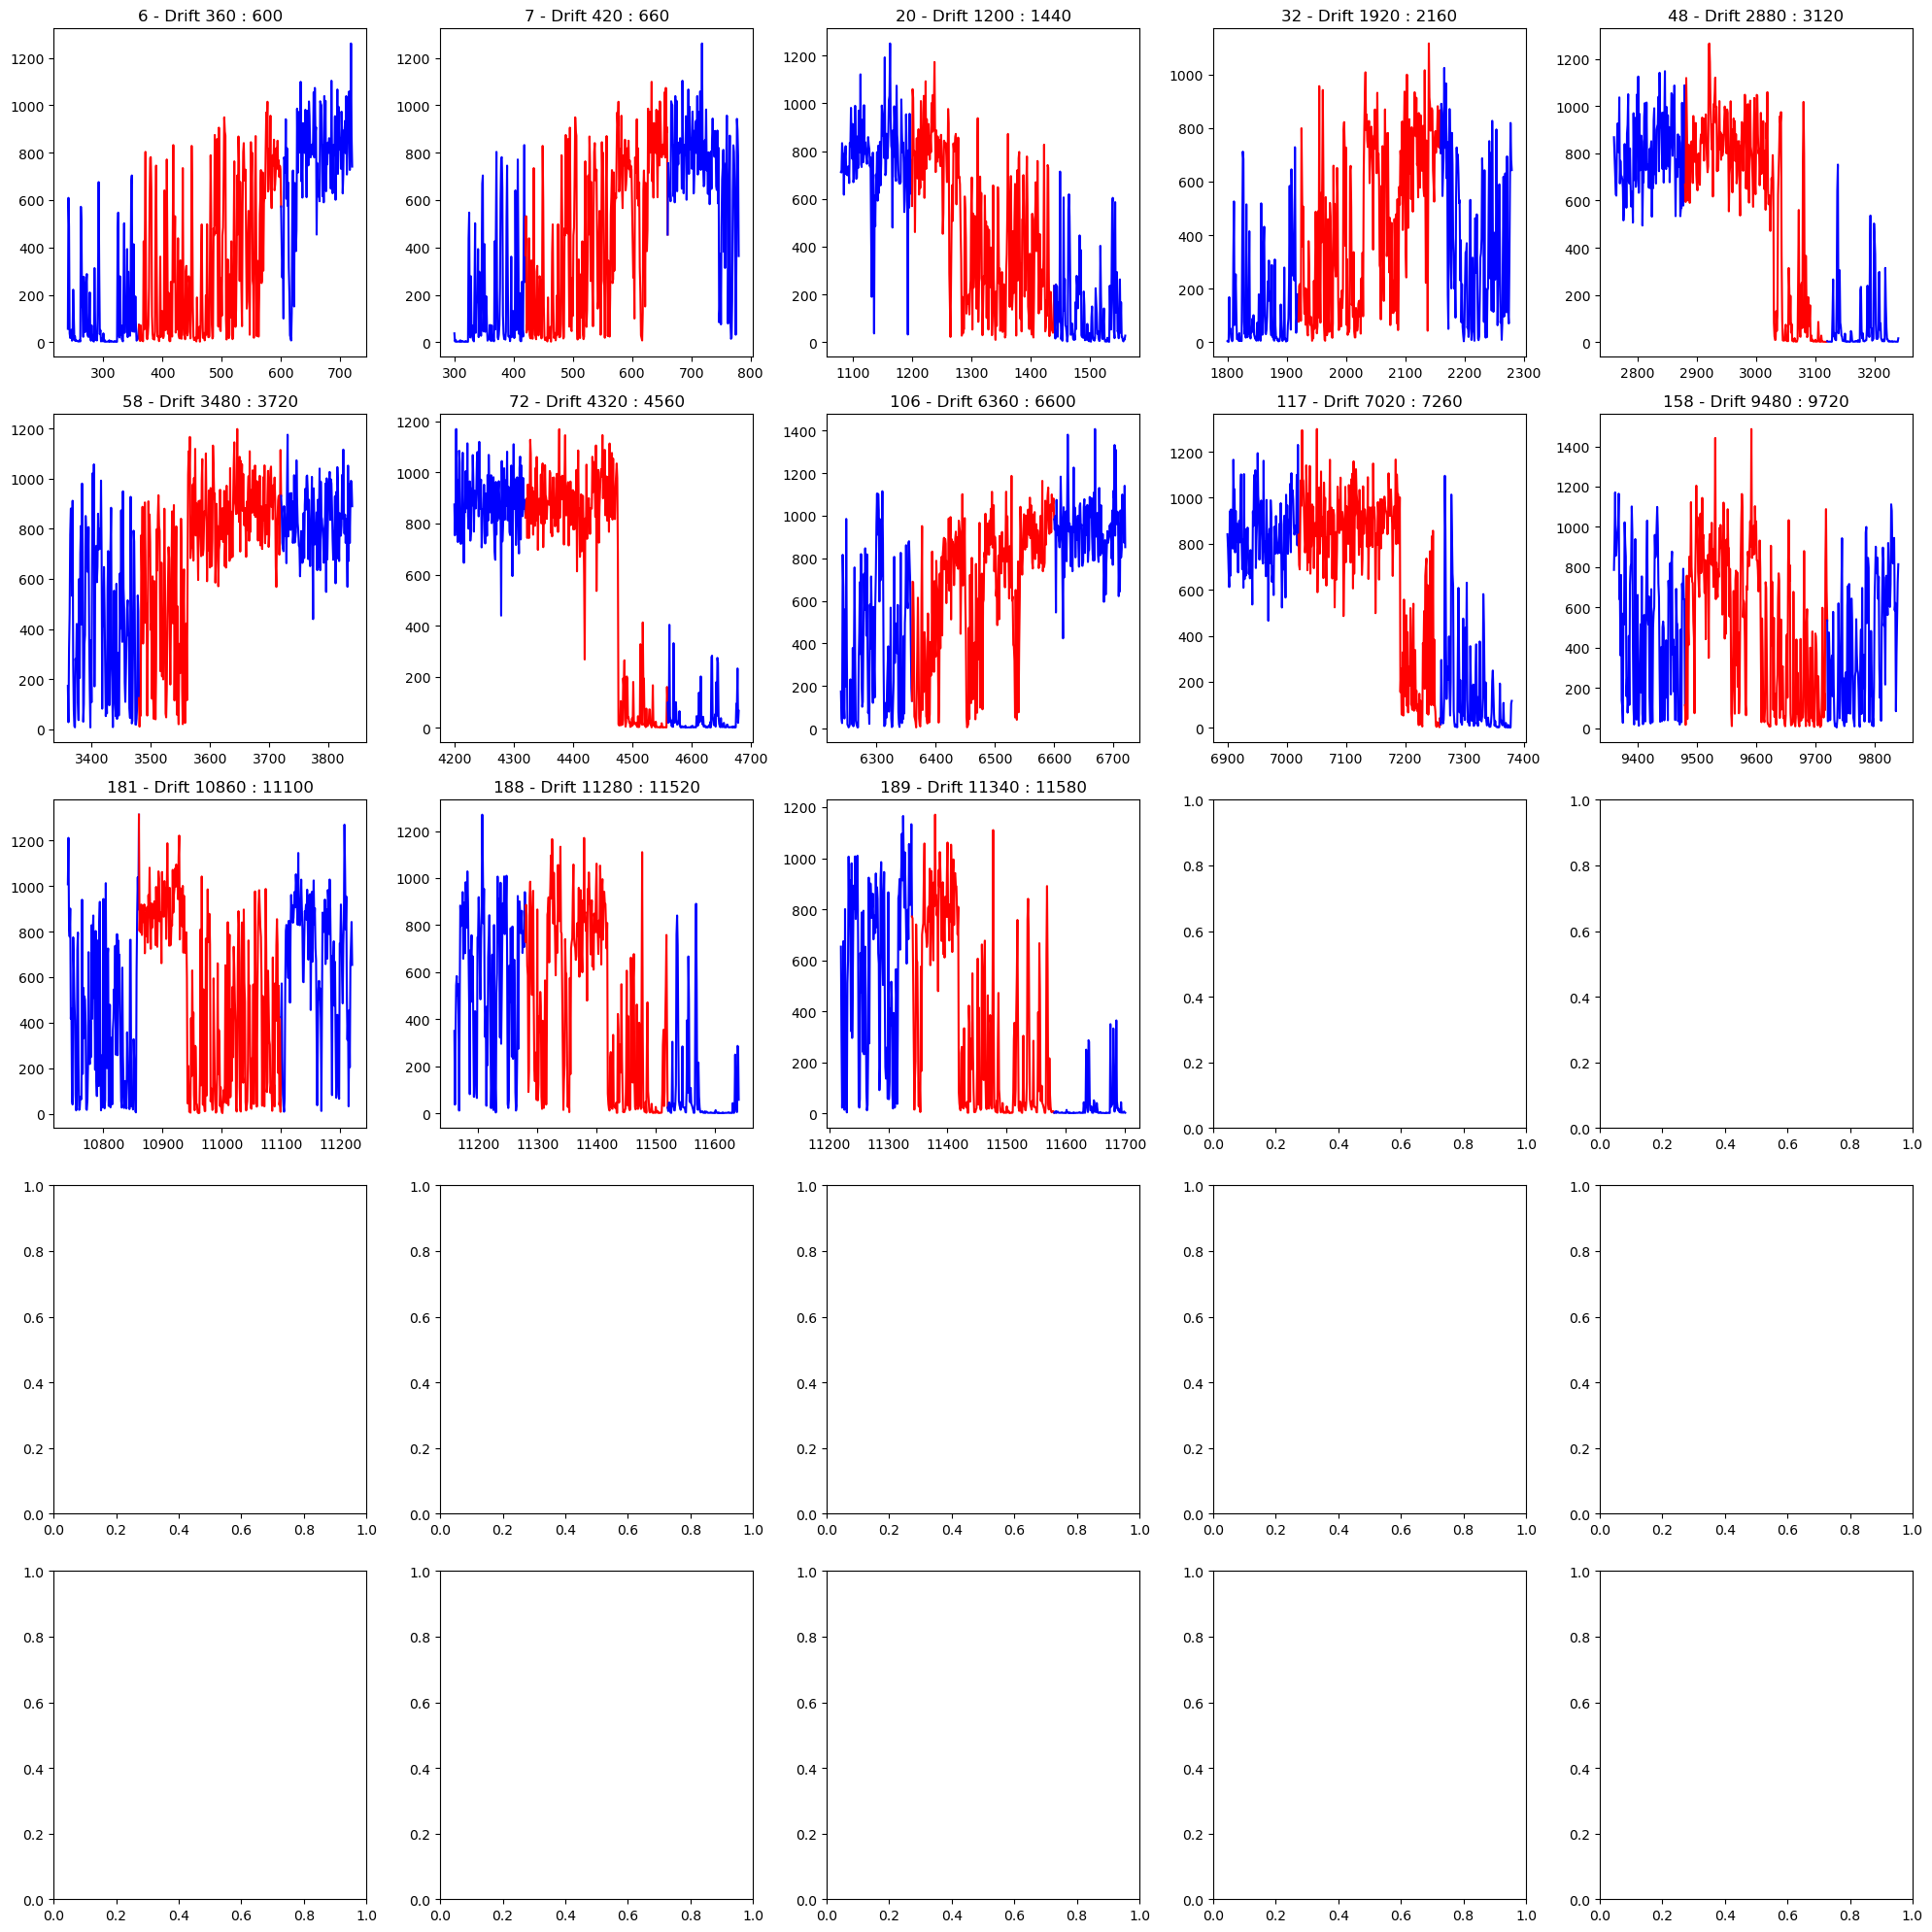

In [50]:
feature = 'iops'

num_drifts = labels_1[f'{feature}_pval_drift'].sum()
print(num_drifts)

drift_indices = labels_1[labels_1[f'{feature}_pval_drift'] == 1].index

drift_starts = labels_1.loc[drift_indices, 'start']
drift_ends = labels_1.loc[drift_indices, 'end']


# Create a figure with a grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

for i in range(num_drifts):
    
    start = drift_starts.iloc[i]
    end = drift_ends.iloc[i]
    
    
    ax = axes[i // 5, i % 5]
    
    before_start = max(0, start - 120)
    before_end = start
    after_start = end
    after_end = min(data_1.shape[0], end + 120)
    
    ax.plot(data_1.loc[before_start:before_end, feature], label=feature, color='blue')
    ax.plot(data_1.loc[start:end, feature], label=feature, color='red')
    ax.plot(data_1.loc[after_start:after_end, feature], label=feature, color='blue')
    ax.set_title(f'{drift_indices[i]} - Drift {start} : {end}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [29]:
elements_to_remove = [6, 22, 25, 146, 150, 160, 161, 191]
mask = np.isin(drift_indices, elements_to_remove, invert=True)
filtered_drift_indices = drift_indices[mask]

In [30]:
drift = labels_1.loc[filtered_drift_indices, ['start', 'end']]
drift['feature'] = feature
drift['dataset_name'] = dataset_name
drift['drift'] = 1
drift['time_split'] = '1m'

In [31]:
drift_df = pd.concat([drift_df, drift])
drift_df

,dataset_name,time_split,start,end,feature,drift
6,1063,1m,360,600,iops,1
7,1063,1m,420,660,iops,1
20,1063,1m,1200,1440,iops,1
32,1063,1m,1920,2160,iops,1
48,1063,1m,2880,3120,iops,1
...,...,...,...,...,...,...
158,1063,1m,9480,9720,write_size_ratio,1
183,1063,1m,10980,11220,write_size_ratio,1
188,1063,1m,11280,11520,write_size_ratio,1
189,1063,1m,11340,11580,write_size_ratio,1


25


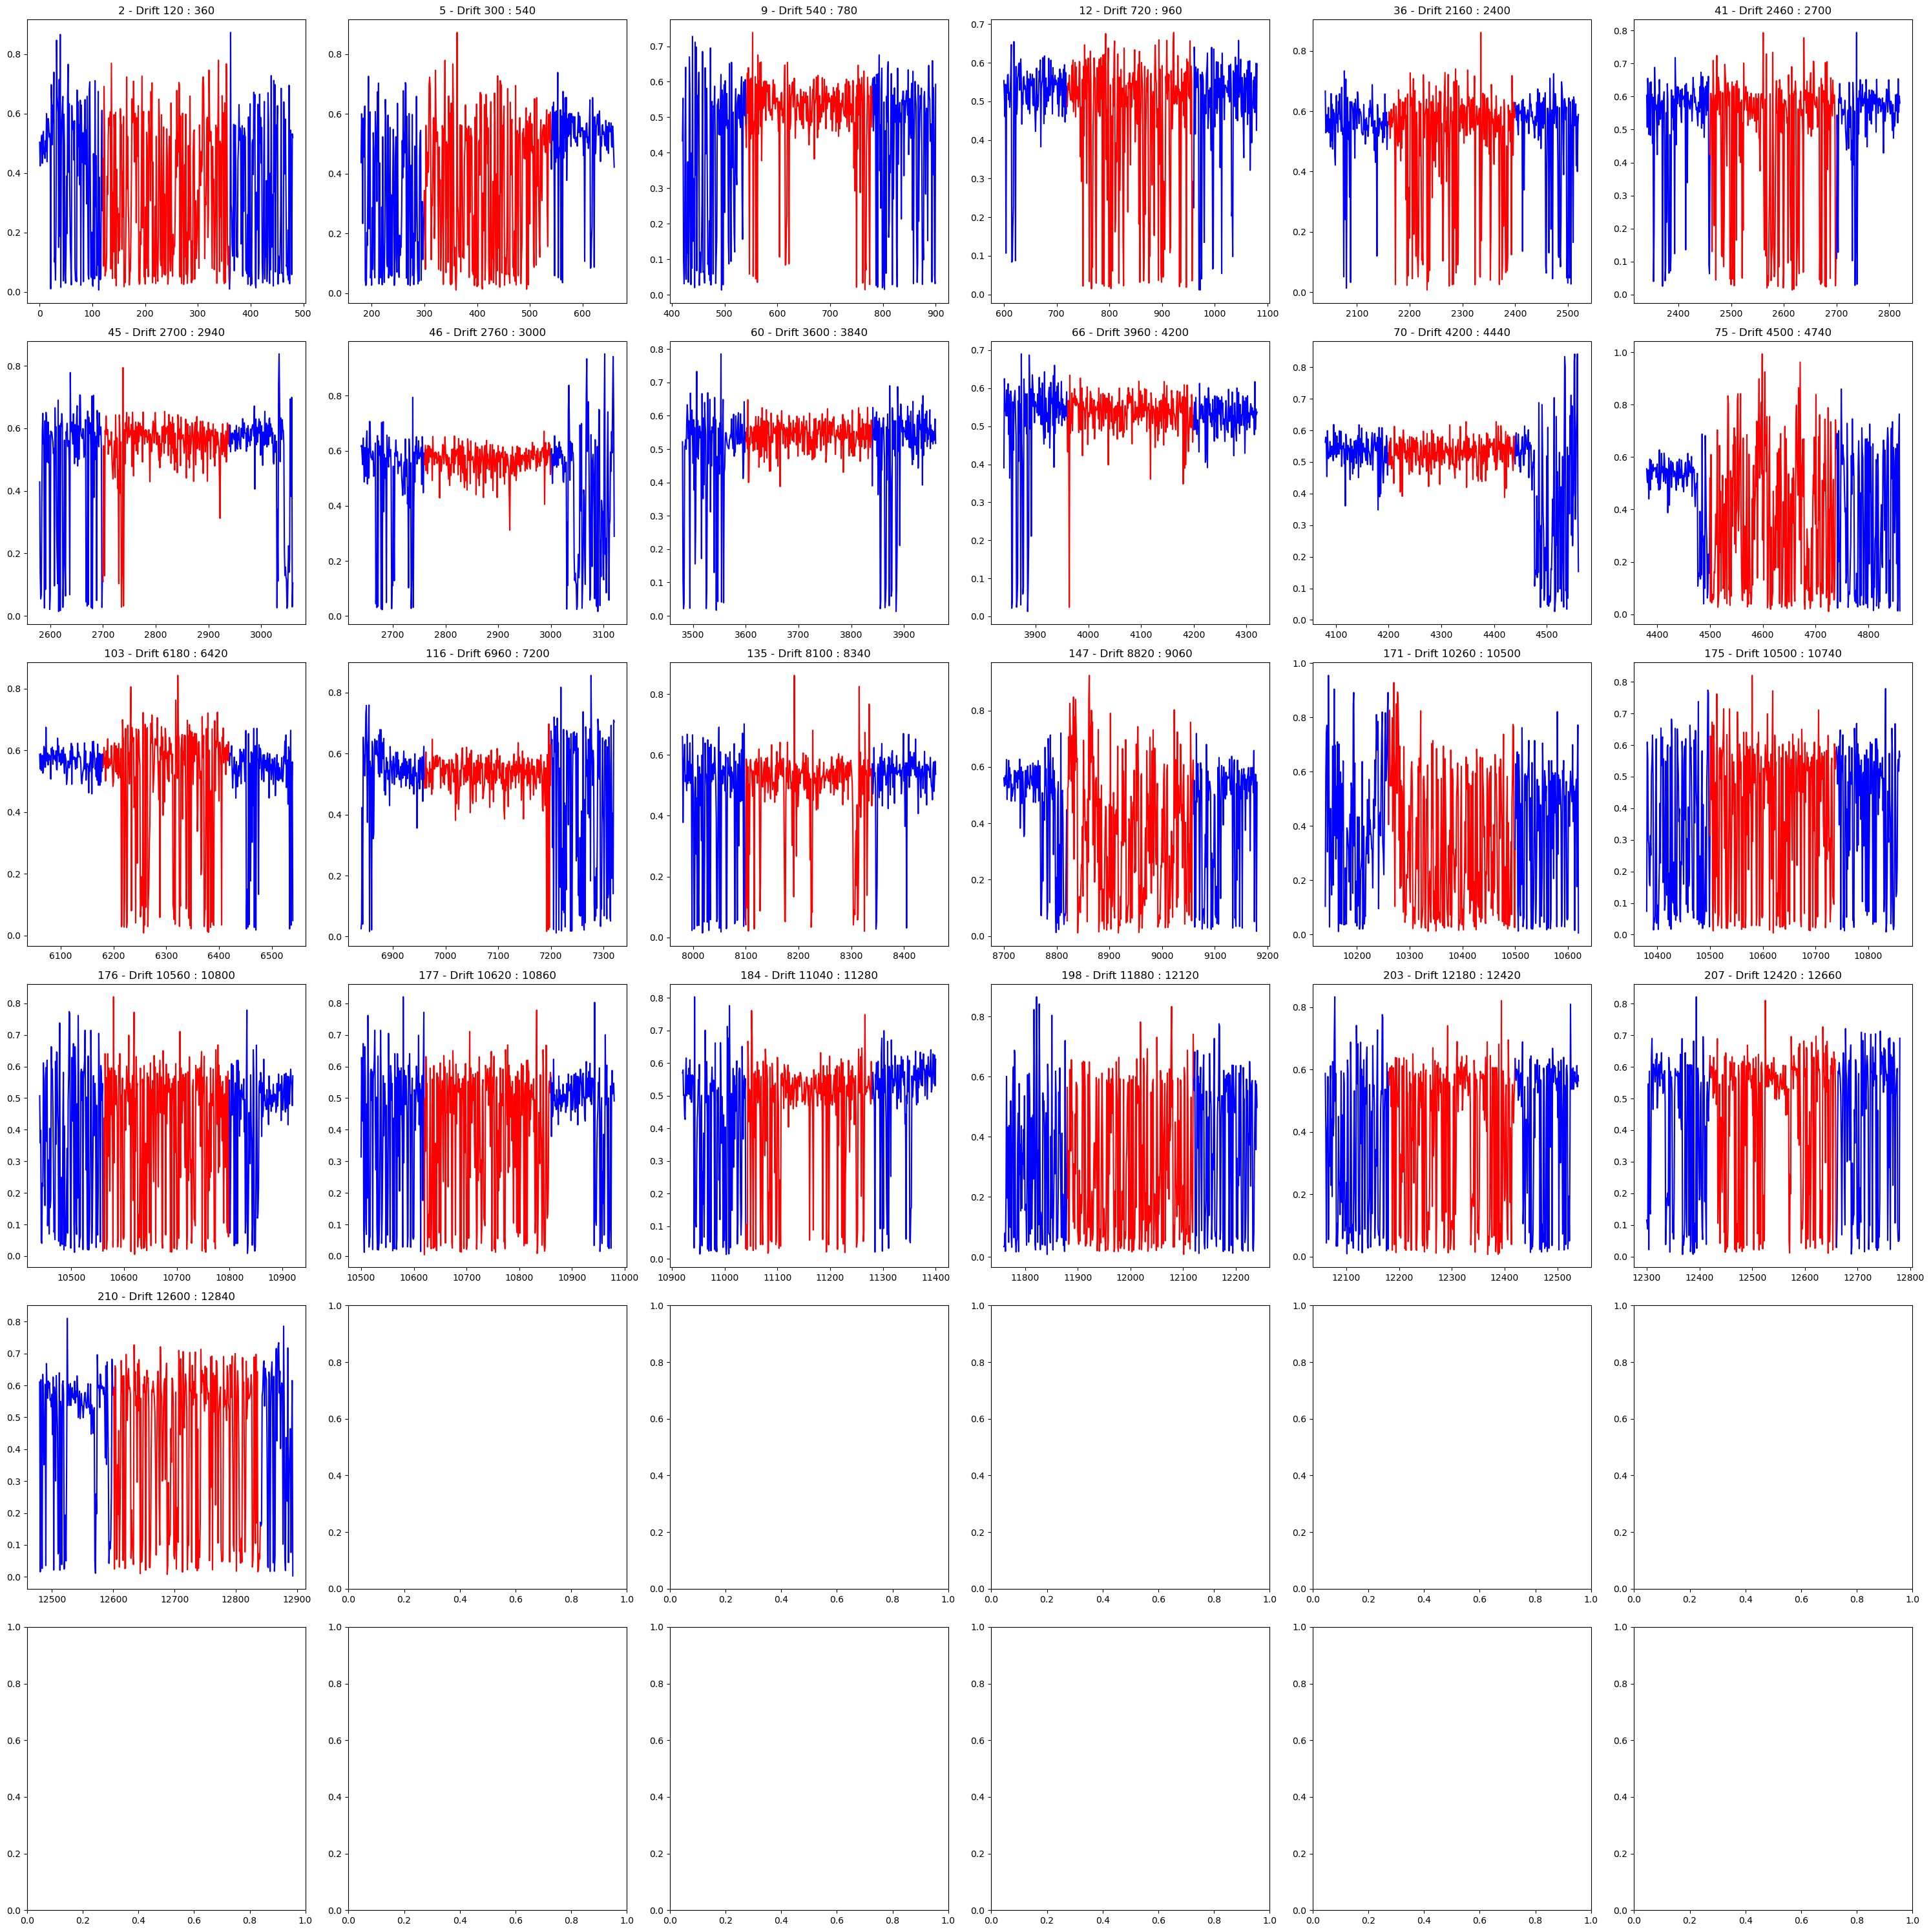

In [32]:
num_nondrifts = labels_1[f'{feature}_pval_nondrift'].sum()
print(num_nondrifts)

drift_indices = labels_1[labels_1[f'{feature}_pval_nondrift'] == 1].index

drift_starts = labels_1.loc[drift_indices, 'start']
drift_ends = labels_1.loc[drift_indices, 'end']


# Create a figure with a grid of subplots
fig, axes = plt.subplots(6, 6, figsize=(30, 30))

for i in range(num_nondrifts):
    
    start = drift_starts.iloc[i]
    end = drift_ends.iloc[i]
    
    
    ax = axes[i // 6, i % 6]
    
    before_start = max(0, start - 120)
    before_end = start
    after_start = end
    after_end = min(data_1.shape[0], end + 120)
    
    ax.plot(data_1.loc[before_start:before_end, feature], label=feature, color='blue')
    ax.plot(data_1.loc[start:end, feature], label=feature, color='red')
    ax.plot(data_1.loc[after_start:after_end, feature], label=feature, color='blue')
    ax.set_title(f'{drift_indices[i]} - Drift {start} : {end}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [33]:
elements_to_remove = [116, 184, 203, 207]
mask = np.isin(drift_indices, elements_to_remove, invert=True)
filtered_drift_indices = drift_indices[mask]

In [34]:
nondrift = labels_1.loc[filtered_drift_indices, ['start', 'end']]
nondrift['feature'] = feature
nondrift['dataset_name'] = dataset_name
nondrift['drift'] = 0
nondrift['time_split'] = '1m'

In [35]:
drift_df = pd.concat([drift_df, nondrift])
drift_df

,dataset_name,time_split,start,end,feature,drift
6,1063,1m,360,600,iops,1
7,1063,1m,420,660,iops,1
20,1063,1m,1200,1440,iops,1
32,1063,1m,1920,2160,iops,1
48,1063,1m,2880,3120,iops,1
...,...,...,...,...,...,...
175,1063,1m,10500,10740,write_size_ratio,0
176,1063,1m,10560,10800,write_size_ratio,0
177,1063,1m,10620,10860,write_size_ratio,0
198,1063,1m,11880,12120,write_size_ratio,0


In [40]:
drift_df.to_csv('/home/cc/clio/drift-detection/output/drifts.csv', index=True)

# Recheck - 5m

11


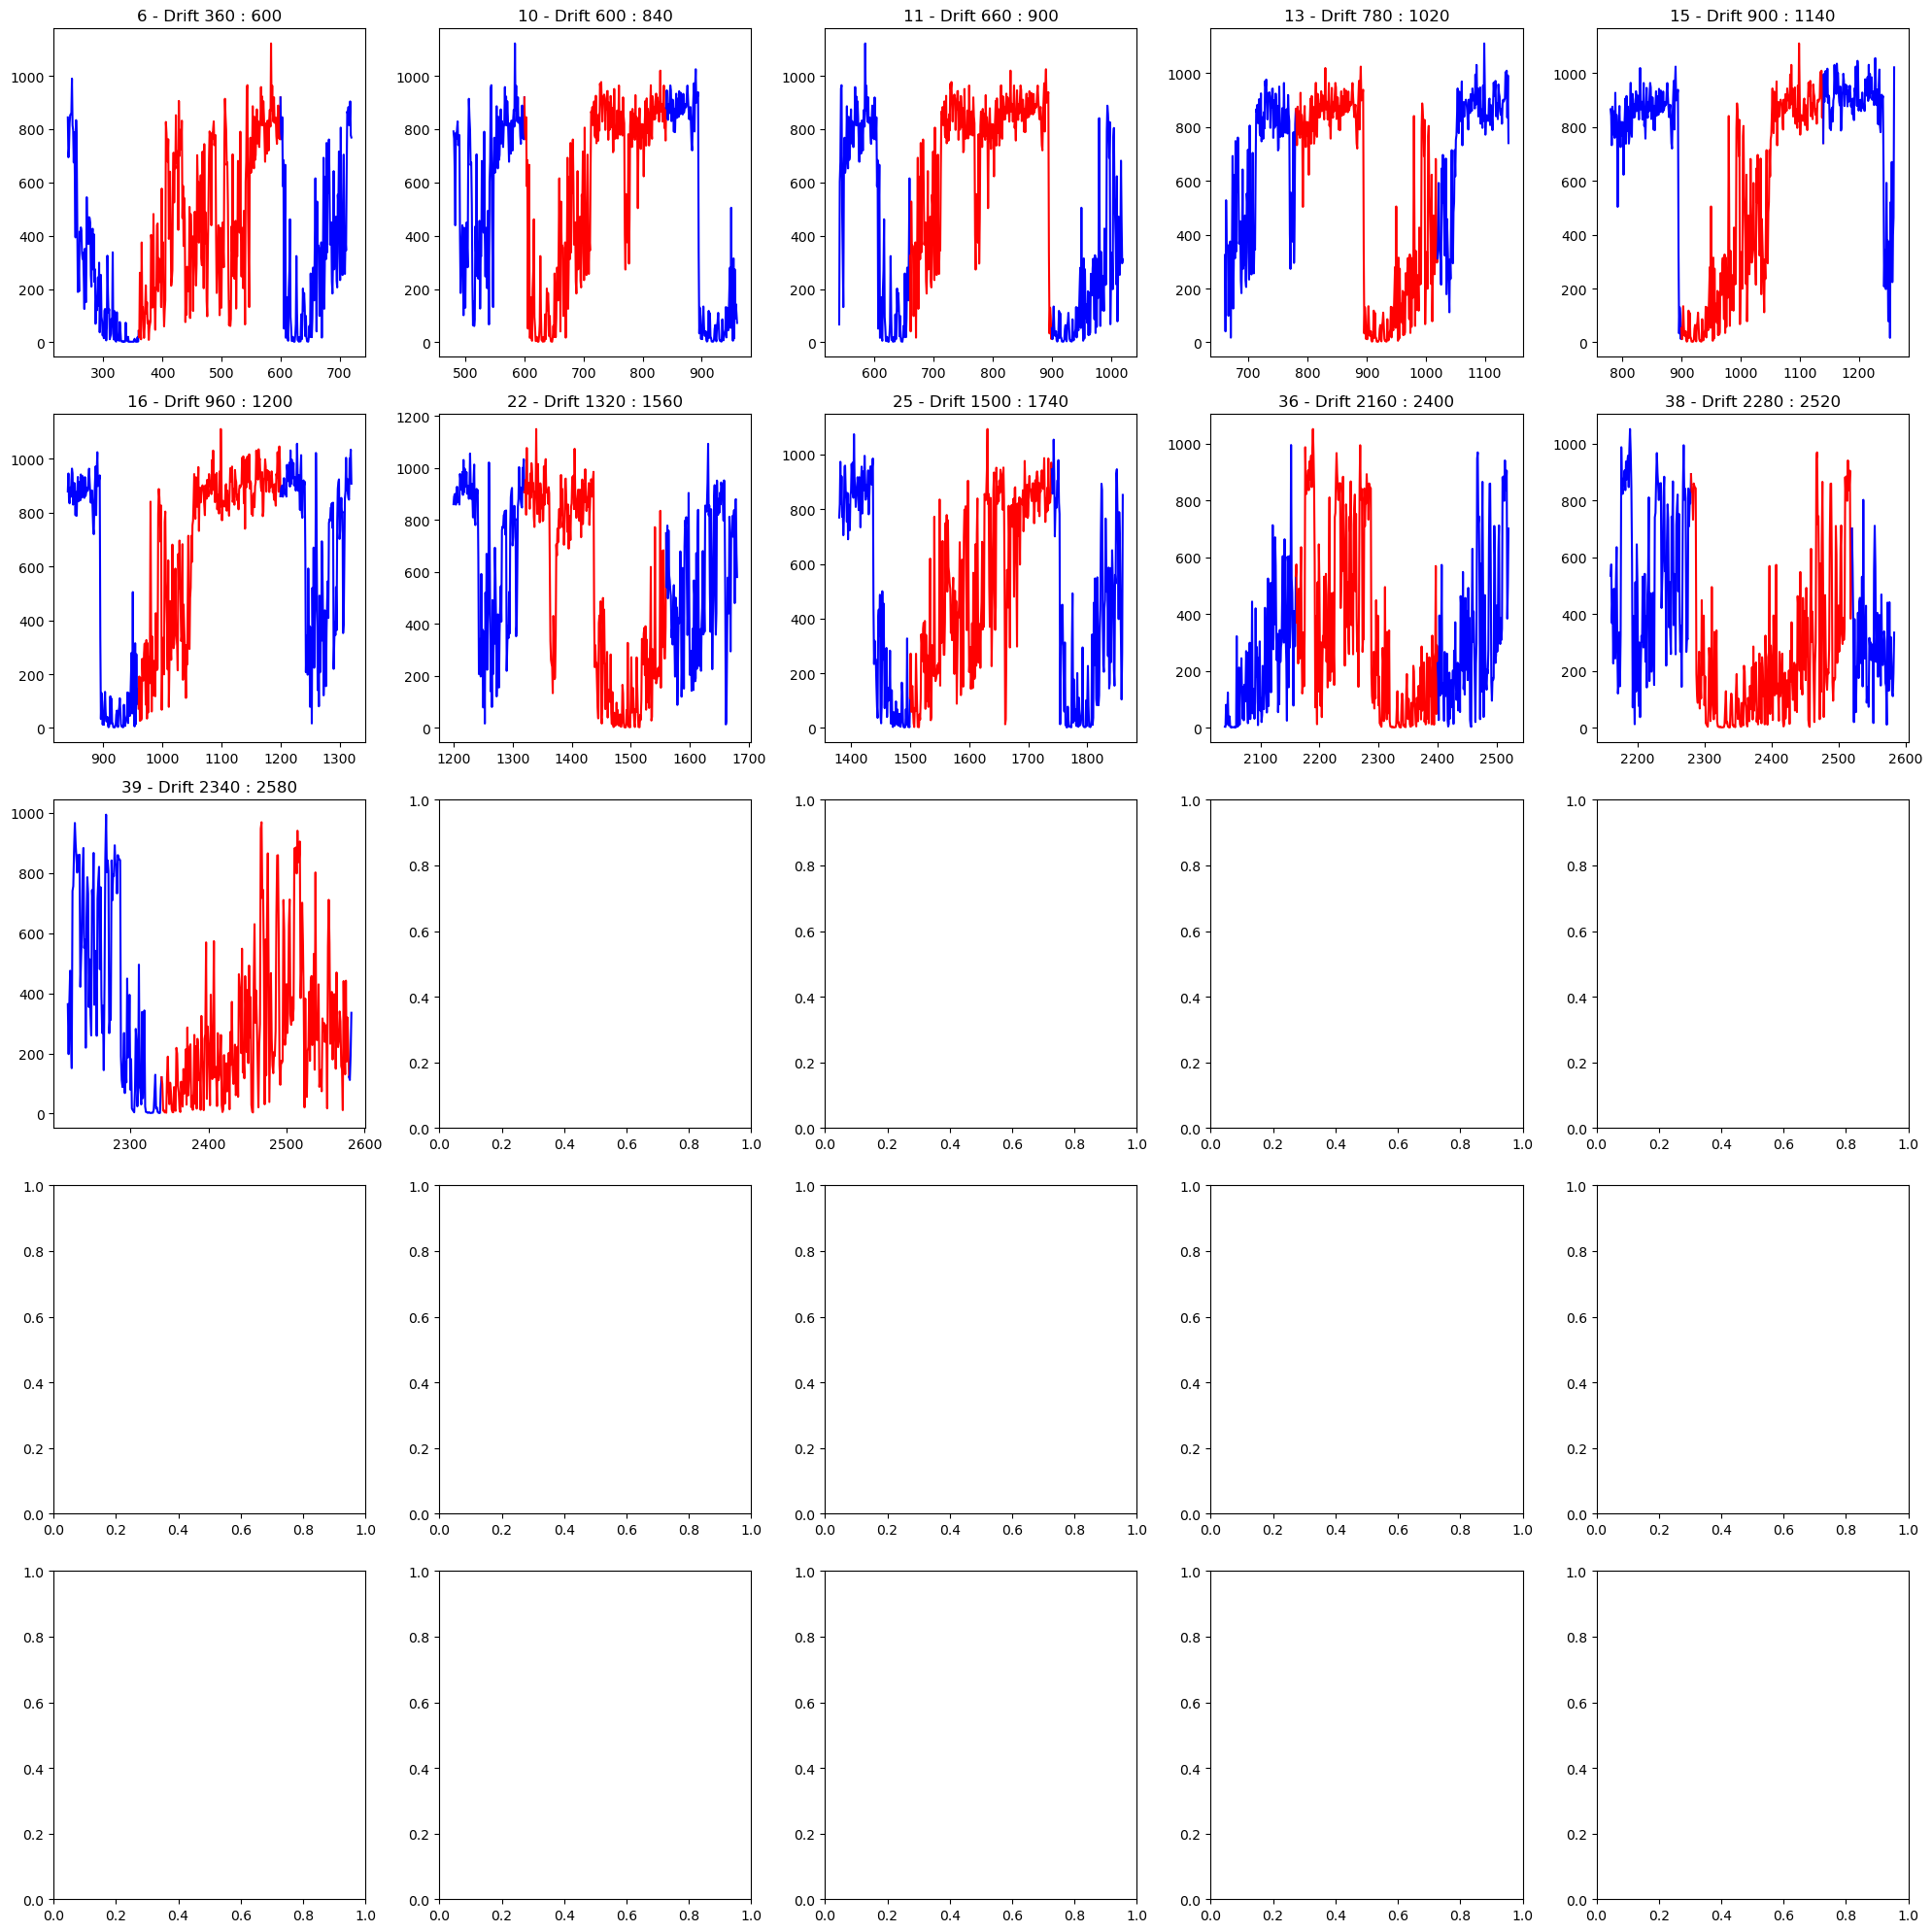

In [42]:
feature = 'iops'

num_drifts = labels_5[f'{feature}_pval_drift'].sum()
print(num_drifts)

drift_indices = labels_5[labels_5[f'{feature}_pval_drift'] == 1].index

drift_starts = labels_5.loc[drift_indices, 'start']
drift_ends = labels_5.loc[drift_indices, 'end']


# Create a figure with a grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

for i in range(num_drifts):
    
    start = drift_starts.iloc[i]
    end = drift_ends.iloc[i]
    
    
    ax = axes[i // 5, i % 5]
    
    before_start = max(0, start - 120)
    before_end = start
    after_start = end
    after_end = min(data_5.shape[0], end + 120)
    
    ax.plot(data_5.loc[before_start:before_end, feature], label=feature, color='blue')
    ax.plot(data_5.loc[start:end, feature], label=feature, color='red')
    ax.plot(data_5.loc[after_start:after_end, feature], label=feature, color='blue')
    ax.set_title(f'{drift_indices[i]} - Drift {start} : {end}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [43]:
elements_to_remove = [11, 38]
mask = np.isin(drift_indices, elements_to_remove, invert=True)
filtered_drift_indices = drift_indices[mask]

In [44]:
drift = labels_1.loc[filtered_drift_indices, ['start', 'end']]
drift['feature'] = feature
drift['dataset_name'] = dataset_name
drift['drift'] = 1
drift['time_split'] = '5m'

In [45]:
drift_df = pd.concat([drift_df, drift])
drift_df

,dataset_name,time_split,start,end,feature,drift
6,1063,1m,360,600,iops,1
7,1063,1m,420,660,iops,1
20,1063,1m,1200,1440,iops,1
32,1063,1m,1920,2160,iops,1
48,1063,1m,2880,3120,iops,1
...,...,...,...,...,...,...
16,1063,5m,960,1200,iops,1
22,1063,5m,1320,1560,iops,1
25,1063,5m,1500,1740,iops,1
36,1063,5m,2160,2400,iops,1


7


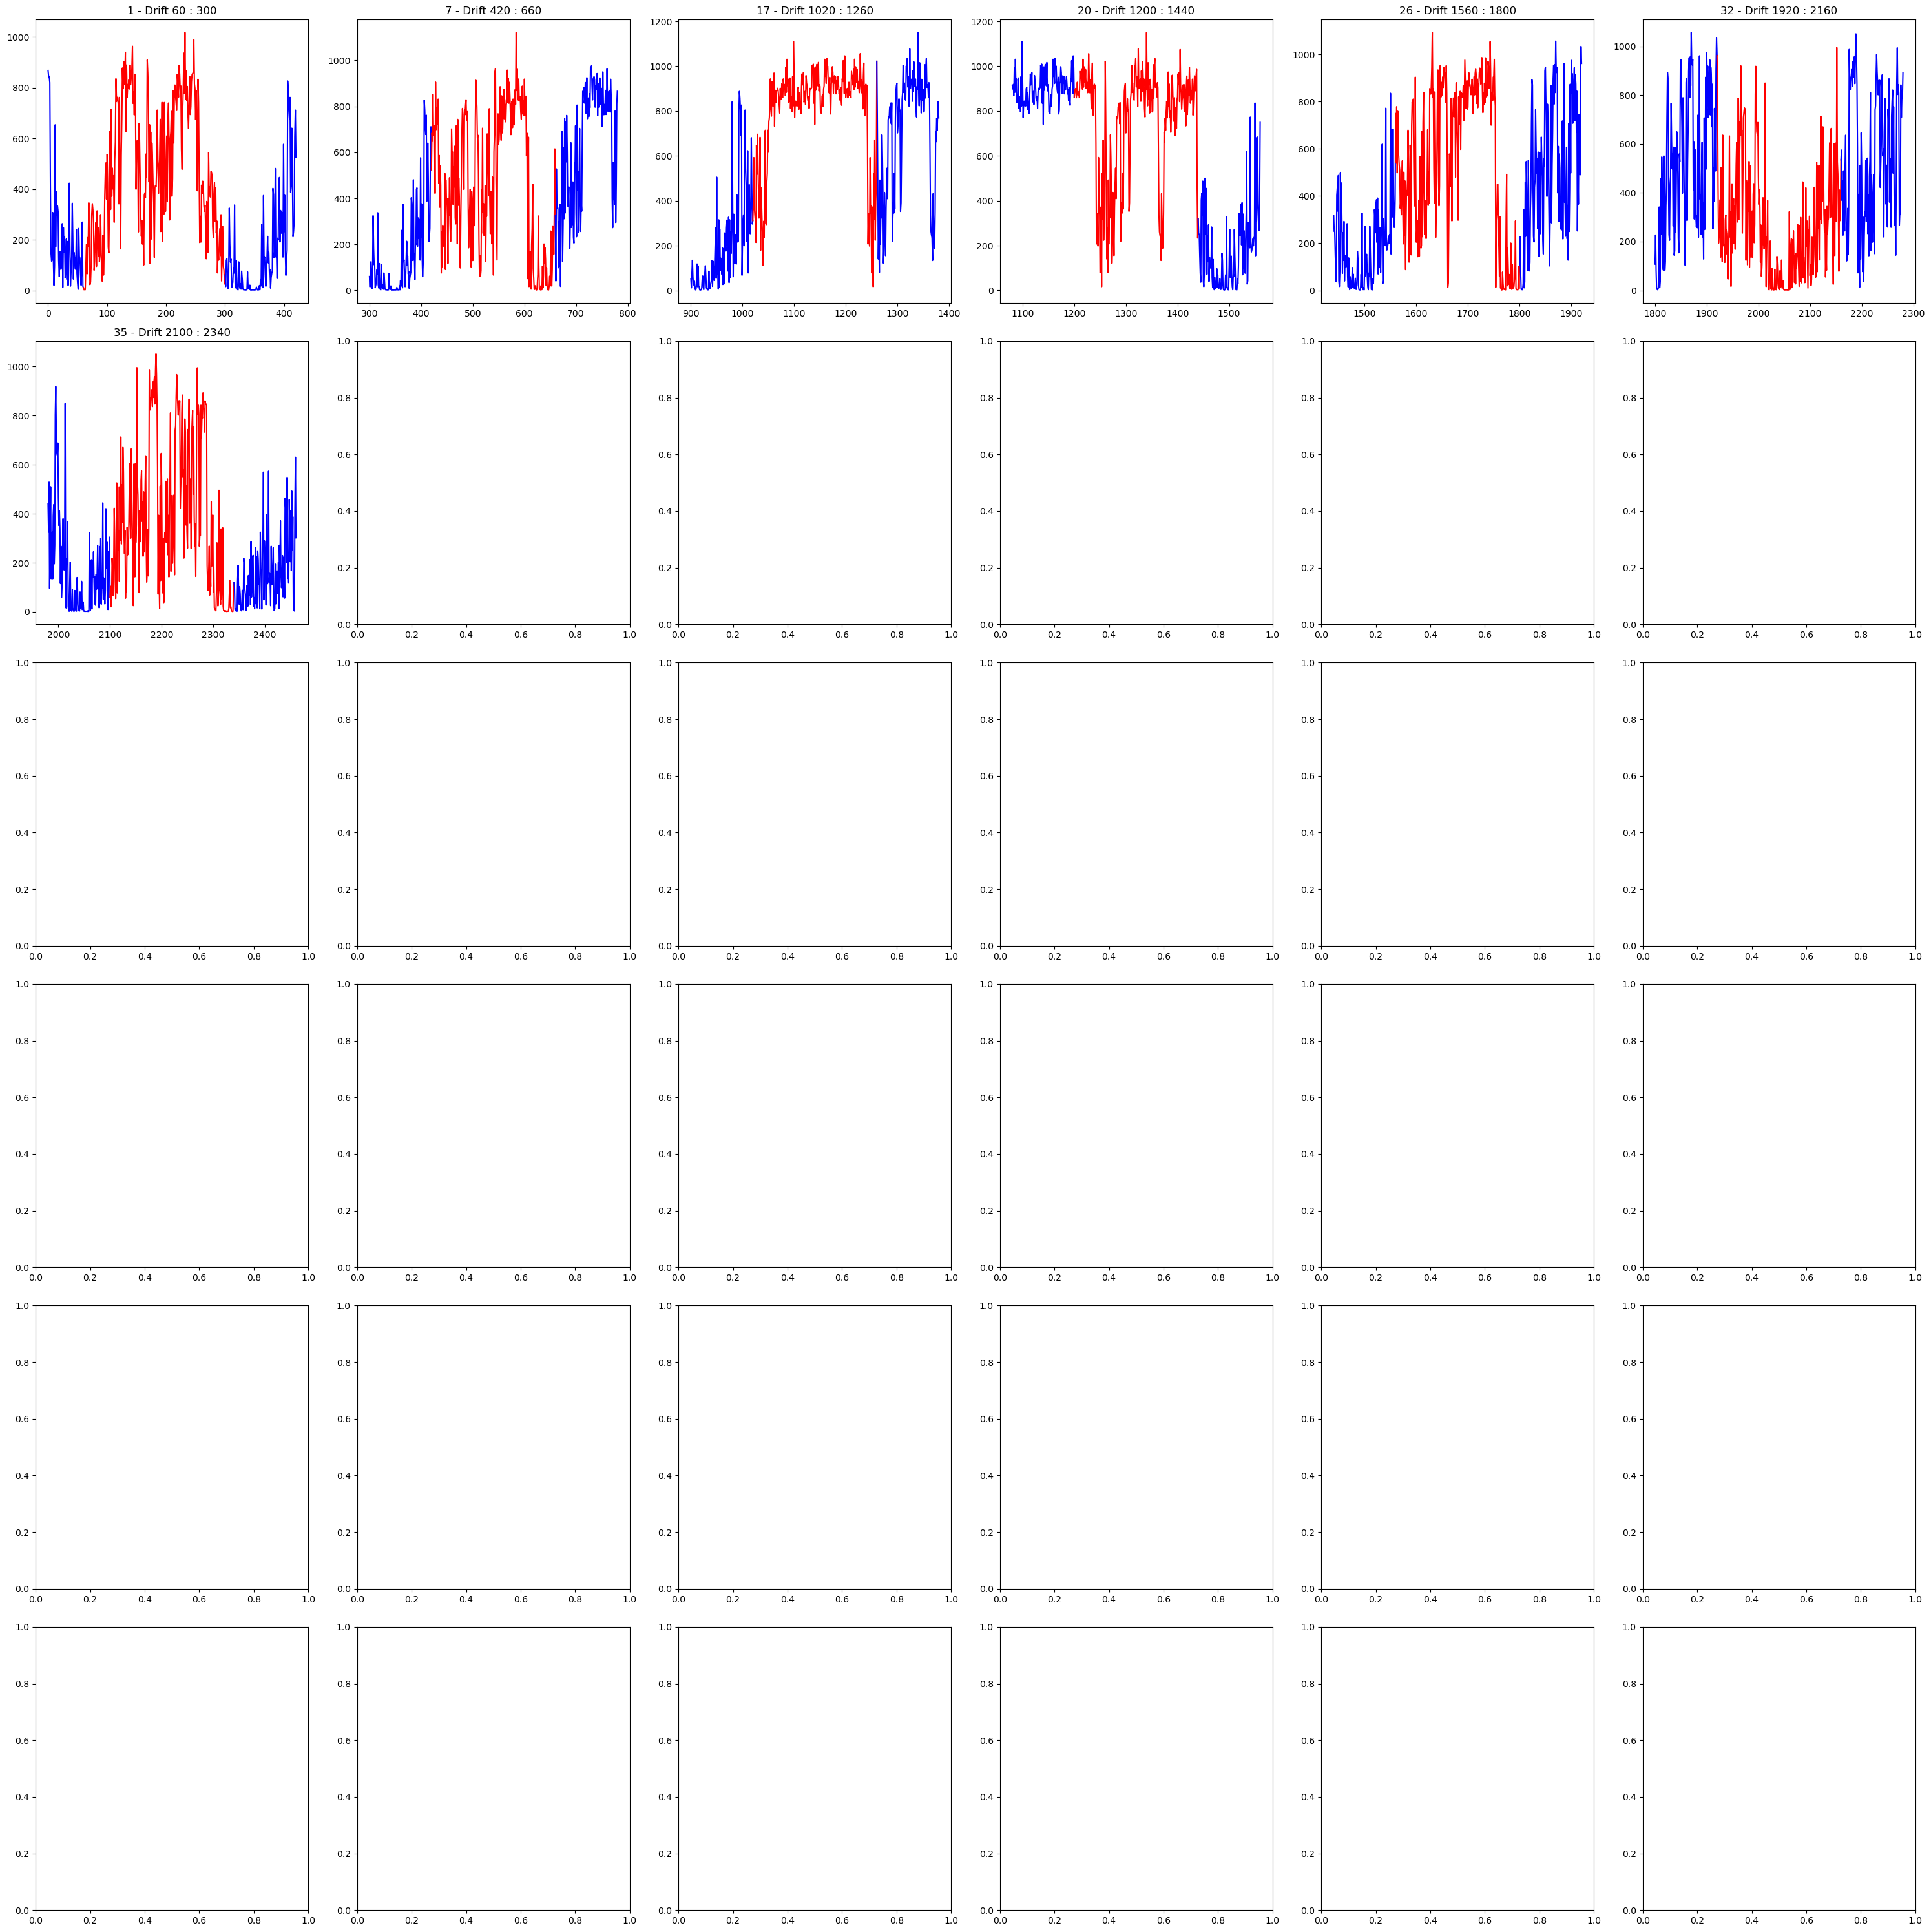

In [46]:
num_nondrifts = labels_5[f'{feature}_pval_nondrift'].sum()
print(num_nondrifts)

drift_indices = labels_5[labels_5[f'{feature}_pval_nondrift'] == 1].index

drift_starts = labels_5.loc[drift_indices, 'start']
drift_ends = labels_5.loc[drift_indices, 'end']


# Create a figure with a grid of subplots
fig, axes = plt.subplots(6, 6, figsize=(30, 30))

for i in range(num_nondrifts):
    
    start = drift_starts.iloc[i]
    end = drift_ends.iloc[i]
    
    
    ax = axes[i // 6, i % 6]
    
    before_start = max(0, start - 120)
    before_end = start
    after_start = end
    after_end = min(data_5.shape[0], end + 120)
    
    ax.plot(data_5.loc[before_start:before_end, feature], label=feature, color='blue')
    ax.plot(data_5.loc[start:end, feature], label=feature, color='red')
    ax.plot(data_5.loc[after_start:after_end, feature], label=feature, color='blue')
    ax.set_title(f'{drift_indices[i]} - Drift {start} : {end}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
elements_to_remove = [116, 184, 203, 207]
mask = np.isin(drift_indices, elements_to_remove, invert=True)
filtered_drift_indices = drift_indices[mask]

In [ ]:
nondrift = labels_1.loc[filtered_drift_indices, ['start', 'end']]
nondrift['feature'] = feature
nondrift['dataset_name'] = dataset_name
nondrift['drift'] = 0
nondrift['time_split'] = '5m'

In [ ]:
drift_df = pd.concat([drift_df, nondrift])
drift_df

In [47]:
drift_df.to_csv('/home/cc/clio/drift-detection/output/drifts.csv', index=True)